In [4]:
import torch
from tqdm import tqdm_notebook as tqdm

from preprocess_data import *
from trainer import Trainer
from model import *
from data_loader import * 
from early_stop import *

def print_result(wr):
	string = "train/val/test={}/{}/{} --> val/test_mse={:.6f}/{:.6f}"
	for i, tup in zip(range(2,8), wr):
		print(string.format(i,i+1,i+2, *tup))



In [ ]:
result = []
models = []
for i in tqdm(range(2,8)):
    model = model_8_2(num_self_att = 4, num_heads = 4, keep_short=24,keep_long=7).cuda()
    ld = Model7Dataloader(month=i, batch_size = 100)
    adam = torch.optim.Adam(model.parameters(), lr=3e-4)
    es = EarlyStopping(patience=50)
    tr = Trainer(model=model, dataloader = ld, early_stopper = es, optimizer = adam)

    result.append(tr.train())
    models.append(model)

In [6]:
print_result(result)

train/val/test=2/3/4 --> val/test_mse=0.846215/1.593078
train/val/test=3/4/5 --> val/test_mse=1.406434/1.837065
train/val/test=4/5/6 --> val/test_mse=1.851201/2.090972
train/val/test=5/6/7 --> val/test_mse=1.942521/1.262990
train/val/test=6/7/8 --> val/test_mse=1.267520/1.524834
train/val/test=7/8/9 --> val/test_mse=1.463681/1.982463


In [7]:
m = models[0]

In [8]:
m

model_8_2(
  (hour_embedding): Embedding(24, 32)
  (day_embedding): Embedding(2, 32)
  (location_embedding): Embedding(171, 32)
  (self_att_projs): ModuleList(
    (0): ModuleList(
      (0): Linear(in_features=32, out_features=8, bias=True)
      (1): Linear(in_features=32, out_features=8, bias=True)
      (2): Linear(in_features=32, out_features=8, bias=True)
      (3): Linear(in_features=32, out_features=8, bias=True)
    )
    (1): ModuleList(
      (0): Linear(in_features=32, out_features=8, bias=True)
      (1): Linear(in_features=32, out_features=8, bias=True)
      (2): Linear(in_features=32, out_features=8, bias=True)
      (3): Linear(in_features=32, out_features=8, bias=True)
    )
    (2): ModuleList(
      (0): Linear(in_features=32, out_features=8, bias=True)
      (1): Linear(in_features=32, out_features=8, bias=True)
      (2): Linear(in_features=32, out_features=8, bias=True)
      (3): Linear(in_features=32, out_features=8, bias=True)
    )
    (3): ModuleList(
      

In [9]:
m.hour_embedding

Embedding(24, 32)

In [168]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot(arr):
    tsne = TSNE(n_components=2, verbose=1, perplexity=400, n_iter=3000)
    tsne_results = tsne.fit_transform(arr)
    tr = tsne_results.transpose()
    x = tr[0]
    y = tr[1]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,10)
    ax.scatter(x=x, y=y)
    for i in range(len(x)):
        ax.annotate(str(i), (x[i], y[i]))
    return tsne_results

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.646702
[t-SNE] KL divergence after 900 iterations: 1.243430


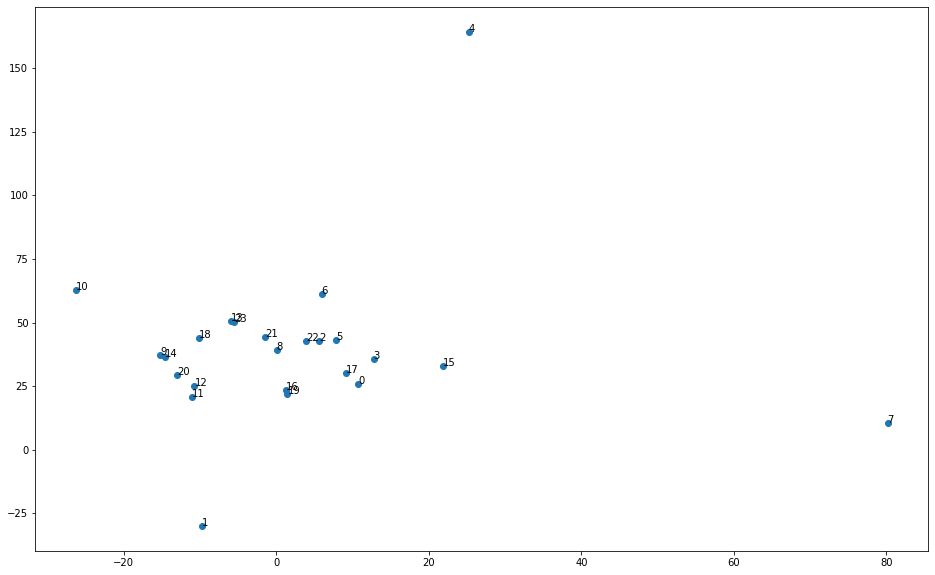

In [172]:
arr = m.hour_embedding(torch.LongTensor([float(i) for i in range(24)]).cuda())
arr = arr.cpu().detach().numpy()
tnse_res = plot(arr)

In [86]:
h_arr = m.hour_embedding(torch.LongTensor([float(i) for i in range(24)]).cuda()).cpu().detach().numpy()
d_arr = m.day_embedding(torch.LongTensor([float(i) for i in range(2)]).cuda()).cpu().detach().numpy()


[t-SNE] Computing 47 nearest neighbors...
[t-SNE] Indexed 48 samples in 0.000s...
[t-SNE] Computed neighbors for 48 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 48 / 48
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.594997
[t-SNE] KL divergence after 1500 iterations: 0.605420


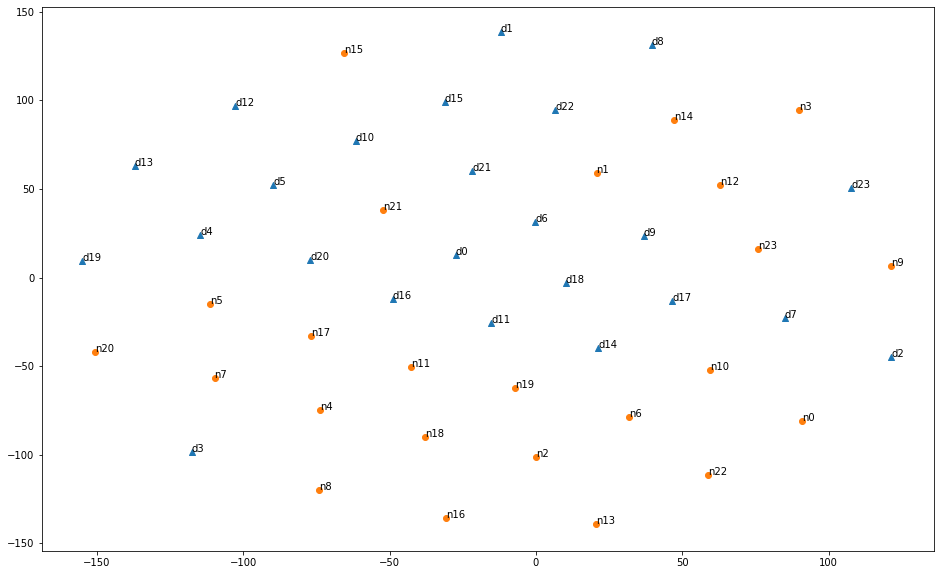

In [175]:
def plot2(arr):
    tsne = TSNE(n_components=2, verbose=1, perplexity=3000, n_iter=30000)
    tsne_results = tsne.fit_transform(arr)
    tr = tsne_results.transpose()
    x1 = tr[0][:24]
    y1 = tr[1][:24]
    x2 = tr[0][24:]
    y2 = tr[1][24:]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(16,10)
    ax.scatter(x=x1, y=y1, marker='^')
    ax.scatter(x=x2, y=y2, marker='o')
    for i in range(len(x1)):
        ax.annotate('d'+str(i), (x1[i], y1[i]))
        ax.annotate('n'+str(i), (x2[i], y2[i]))
    return tsne_results
hd_arr = np.vstack(
    [[np.array([np.append(he, d_arr[0]) for he in h_arr])],
    [np.array([np.append(he, d_arr[1]) for he in h_arr])]]
)

# 0~23 : 
arr = hd_arr.reshape(-1, 64)
tnse_res = plot2(arr)

[t-SNE] Computing 170 nearest neighbors...
[t-SNE] Indexed 171 samples in 0.000s...
[t-SNE] Computed neighbors for 171 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 171 / 171
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.506447
[t-SNE] KL divergence after 400 iterations: 0.000001


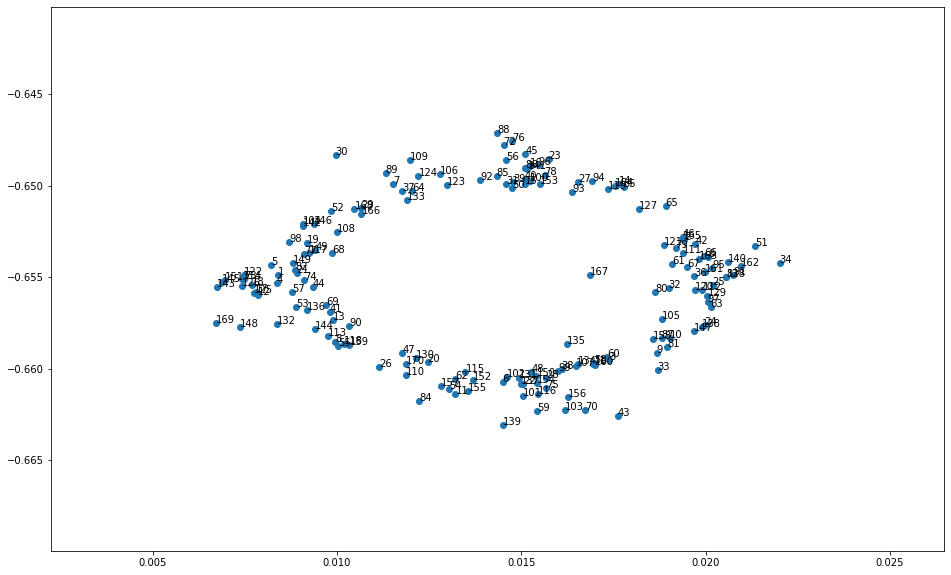

In [162]:
def plot(arr):
    tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=1000)
    tsne_results = tsne.fit_transform(arr)
    tr = tsne_results.transpose()
    x = tr[0]
    y = tr[1]
    fig, ax = plt.subplots()
    fig.set_size_inches(16,10)
    ax.scatter(x=x, y=y)
    for i in range(len(x)):
        ax.annotate(str(i), (x[i], y[i]))
    return tsne_results

arr = m.location_embedding(torch.LongTensor([float(i) for i in range(171)]).cuda())
arr = arr.cpu().detach().numpy()
tnse_res = plot(arr)